In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [177]:
Customers = pd.read_csv("Customers.csv")
Products = pd.read_csv("Products.csv")
Transactions = pd.read_csv("Transactions.csv")

In [178]:
Customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [179]:
Customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [180]:
Customers.describe()

,CustomerID,CustomerName,Region,SignupDate
count,200,200,200,200
unique,200,200,4,179
top,C0001,Lawrence Carroll,South America,2024-11-11
freq,1,1,59,3


In [181]:
Products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [182]:
Products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [183]:
Products.describe()

,Price
count,100.000000
mean,267.551700
std,143.219383
min,16.080000
25%,147.767500
50%,292.875000
75%,397.090000
max,497.760000


In [184]:
Transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [185]:
Transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [186]:
Transactions.describe()

,Quantity,TotalValue,Price
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


## CLEANING

In [187]:
Customers.isnull().sum()

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

In [188]:
Customers.duplicated().sum()

0

In [189]:
Products.isnull().sum()

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

In [190]:
Products.duplicated().sum()

0

In [191]:
Transactions.isnull().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

In [192]:
Transactions.duplicated().sum()

0

# EDA

### Analyzing Customers Data

In [193]:
Customers["SignupDate"] = pd.to_datetime(Customers["SignupDate"])
Customers["Signup_Month"] = Customers["SignupDate"].dt.month
Customers["Signup_Year"] = Customers["SignupDate"].dt.year
Customers["Signup_Day"] = Customers["SignupDate"].dt.day
Customers.drop(columns=["SignupDate"], inplace = True)

In [194]:
Customers.head()

,CustomerID,CustomerName,Region,Signup_Month,Signup_Year,Signup_Day
0,C0001,Lawrence Carroll,South America,7,2022,10
1,C0002,Elizabeth Lutz,Asia,2,2022,13
2,C0003,Michael Rivera,South America,3,2024,7
3,C0004,Kathleen Rodriguez,South America,10,2022,9
4,C0005,Laura Weber,Asia,8,2022,15


In [195]:
Customers["Signup_Year"].unique()

array([2022, 2024, 2023])

In [196]:
Customers["Signup_Month"].unique()

array([ 7,  2,  3, 10,  8,  1,  6, 12,  5, 11,  9,  4])

In [197]:
# Annual Trends
annual_trends = Customers["Signup_Year"].value_counts().sort_index()
print(annual_trends)

Signup_Year
2022    64
2023    57
2024    79
Name: count, dtype: int64


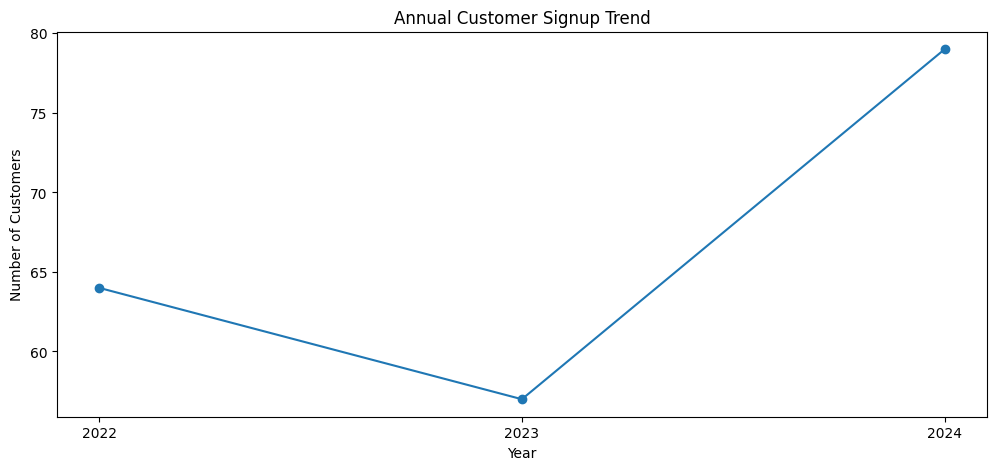

In [198]:
annual_trends.plot(kind = "line", title = "Annual Customer Signup Trend",marker = "o",figsize=(12,5))
plt.xlabel("Year")
plt.ylabel("Number of Customers")
plt.xticks([2022,2023,2024])
plt.show()

In [199]:
#Monthly trends
monthly_trends = Customers["Signup_Month"].value_counts().sort_index()
print(annual_trends)

Signup_Year
2022    64
2023    57
2024    79
Name: count, dtype: int64


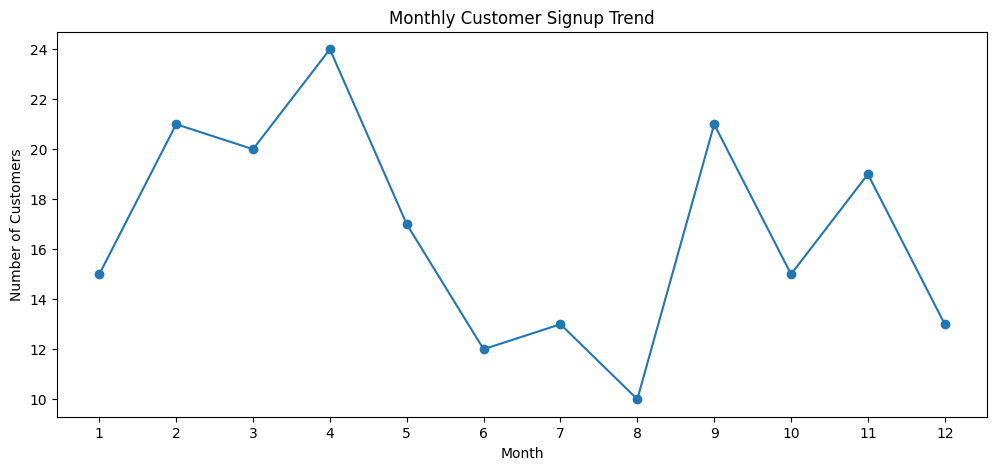

In [200]:
monthly_trends.plot(kind = "line", title = "Monthly Customer Signup Trend",marker = "o",figsize=(12,5))
plt.xlabel("Month")
plt.ylabel("Number of Customers")
plt.xticks(range(1,13))
plt.show()

In [201]:
# Region Count
region_count = Customers["Region"].value_counts()
print(region_count)

Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


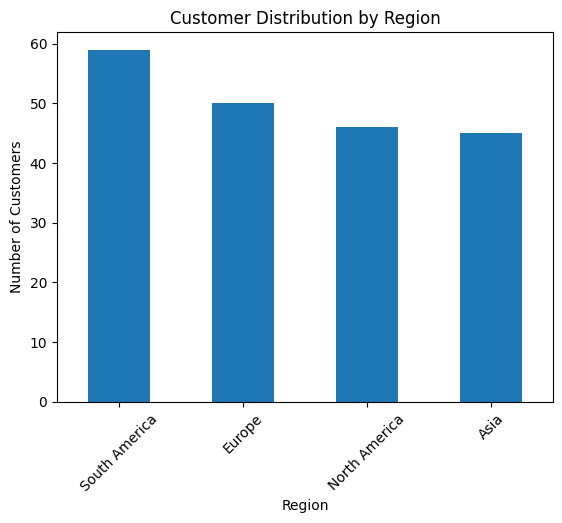

In [202]:
region_count.plot(kind="bar", title="Customer Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.show()

### Analyzing Products Data

In [203]:
Products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [204]:
# Category Count
category_count = Products["Category"].value_counts()
print(category_count)

Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64


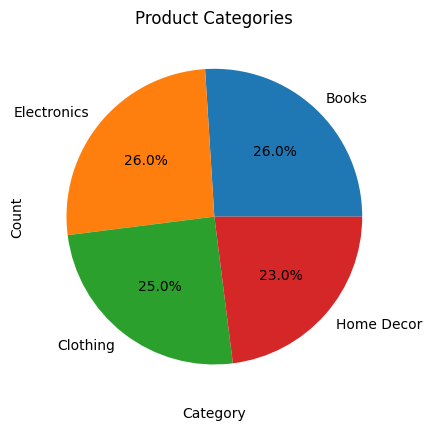

In [205]:
category_count.plot(kind="pie",autopct = "%1.1f%%", title="Product Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

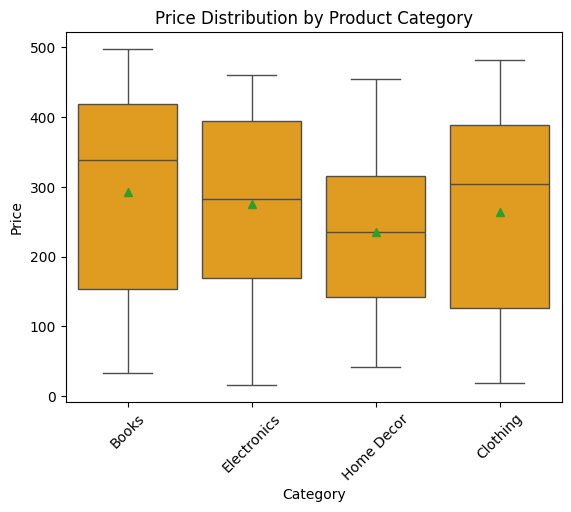

In [206]:
#Price Distribution

ax = sns.boxplot(data=Products, x='Category', y='Price',showmeans = True, color = "orange")

# for i, mean in enumerate(mean_category_price):
#     ax.text(i, mean, f'{mean:.2f}', ha='right', color='red')
    
plt.title('Price Distribution by Product Category')
plt.xticks(rotation=45)
plt.show()


In [207]:
# Mean category Price
mean_category_price = Products.groupby("Category")["Price"].mean().sort_values()
print(mean_category_price)

Category
Home Decor     235.020000
Clothing       263.720000
Electronics    275.353462
Books          292.212308
Name: Price, dtype: float64


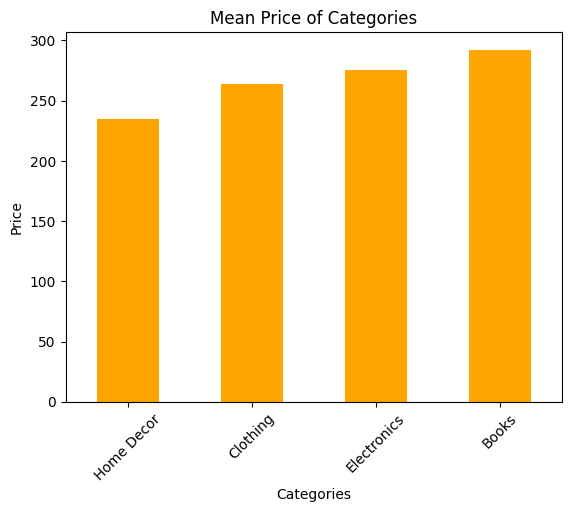

In [208]:
mean_category_price.plot(kind = "bar", title = "Mean Price of Categories",color = "orange")
plt.xlabel("Categories")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()

### Analyzig Transactions Data

In [209]:
Transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [210]:
Transactions["TransactionDate"] = pd.to_datetime(Transactions["TransactionDate"])
Transactions["Transaction_Month"] = Transactions["TransactionDate"].dt.month
Transactions["Transaction_Year"] = Transactions["TransactionDate"].dt.year
Transactions["Transaction_Day"] = Transactions["TransactionDate"].dt.day
Transactions["Transaction_Time"] = Transactions["TransactionDate"].dt.hour
Transactions.drop(columns = ["TransactionDate"], inplace = True)

In [211]:
Transactions.head()

,TransactionID,CustomerID,ProductID,Quantity,TotalValue,Price,Transaction_Month,Transaction_Year,Transaction_Day,Transaction_Time
0,T00001,C0199,P067,1,300.68,300.68,8,2024,25,12
1,T00112,C0146,P067,1,300.68,300.68,5,2024,27,22
2,T00166,C0127,P067,1,300.68,300.68,4,2024,25,7
3,T00272,C0087,P067,2,601.36,300.68,3,2024,26,22
4,T00363,C0070,P067,3,902.04,300.68,3,2024,21,15


In [212]:
#monthly trasaction SUm
monthly_transactions_sum = Transactions.groupby("Transaction_Month")["TotalValue"].sum()
print(monthly_transactions_sum)

Transaction_Month
1     66376.39
2     51459.27
3     47828.73
4     57519.06
5     64527.74
6     48771.18
7     71366.39
8     63436.74
9     70603.75
10    47063.22
11    38224.37
12    62818.72
Name: TotalValue, dtype: float64


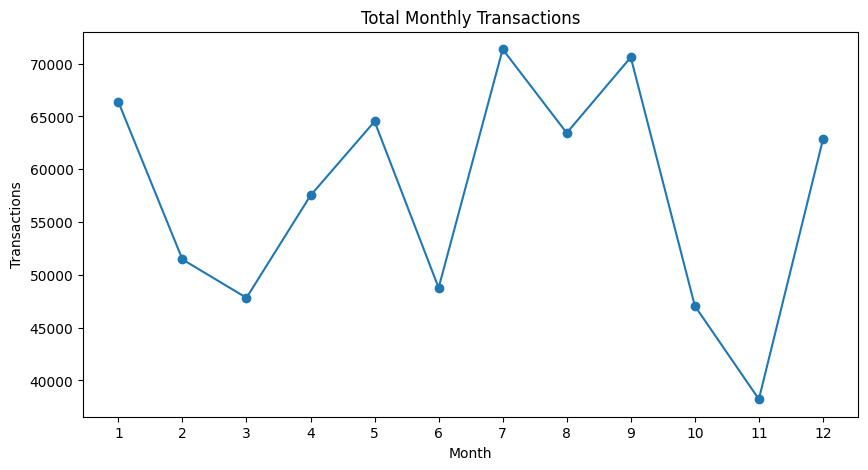

In [213]:
monthly_transactions_sum.plot(kind = "line", title = "Total Monthly Transactions", marker = "o", figsize = [10,5])
plt.xlabel("Month")
plt.ylabel("Transactions")
plt.xticks(range(1,13))
plt.show()

In [214]:
#montly transaction count
monthly_transactions_count = Transactions["Transaction_Month"].value_counts().sort_index()
print(monthly_transactions_count)

Transaction_Month
1     107
2      77
3      80
4      86
5      86
6      69
7      96
8      94
9      96
10     70
11     57
12     82
Name: count, dtype: int64


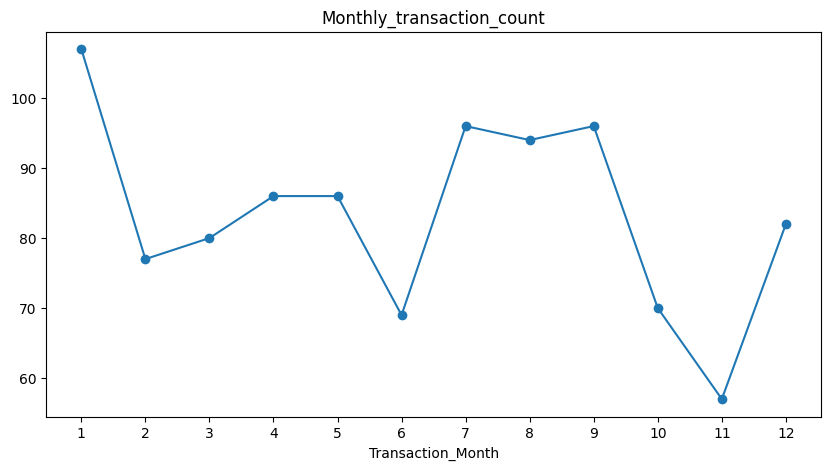

In [215]:
monthly_transactions_count.plot(kind = "line", title = "Monthly_transaction_count",marker = "o",figsize = [10,5])
plt.xlabels = "Month"
plt.ylabels = "Transaction Count"
plt.xticks(range(1,13))
plt.show()

In [216]:
#monthly Transaction mean
monthly_transactions_mean = Transactions.groupby("Transaction_Month")["TotalValue"].mean()
print(monthly_transactions_mean)

Transaction_Month
1     620.340093
2     668.302208
3     597.859125
4     668.826279
5     750.322558
6     706.828696
7     743.399896
8     674.858936
9     735.455729
10    672.331714
11    670.602982
12    766.081951
Name: TotalValue, dtype: float64


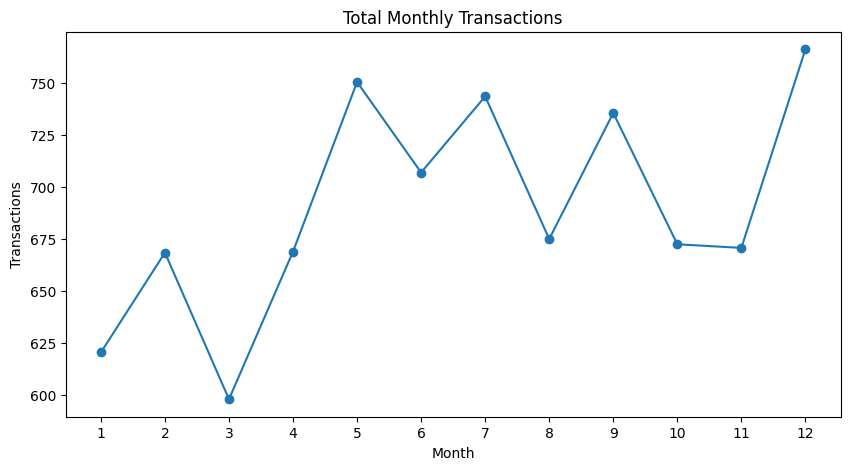

In [217]:
monthly_transactions_mean.plot(kind = "line", title = "Total Monthly Transactions", marker = "o", figsize = [10,5])
plt.xlabel("Month")
plt.ylabel("Transactions")
plt.xticks(range(1,13))
plt.show()

In [218]:
#transaction Hours
transaction_hours = Transactions["Transaction_Time"].value_counts().sort_index()
print(transaction_hours)

Transaction_Time
0     42
1     34
2     37
3     51
4     44
5     33
6     39
7     45
8     35
9     48
10    42
11    39
12    37
13    30
14    60
15    36
16    51
17    47
18    42
19    45
20    39
21    41
22    46
23    37
Name: count, dtype: int64


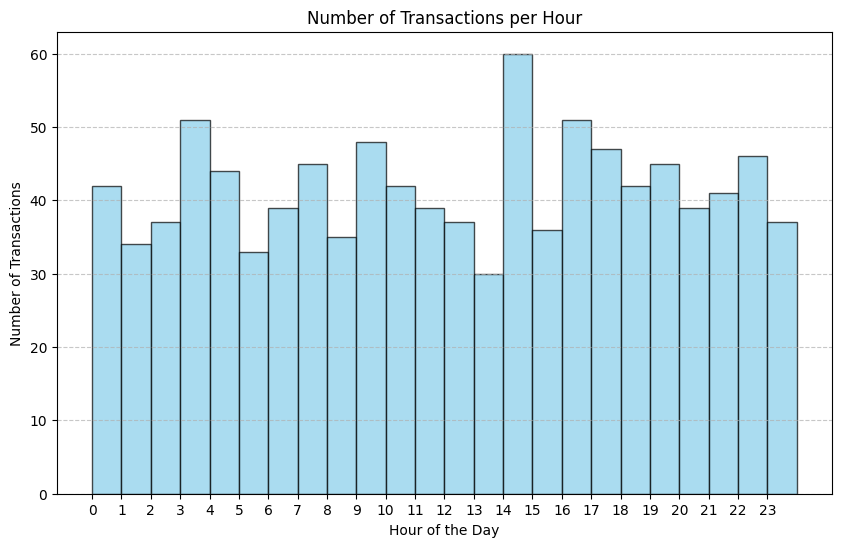

In [219]:
plt.figure(figsize=(10, 6))
plt.hist(Transactions['Transaction_Time'], bins=range(0, 25), color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Number of Transactions per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.xticks(range(0, 24))  # Ensure all hours are shown
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

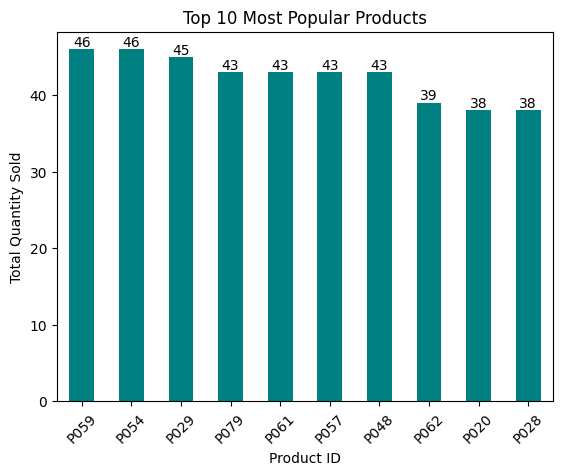

In [220]:
# Popular products by quantity sold
popular_products = Transactions.groupby("ProductID")["Quantity"].sum().sort_values(ascending=False).head(10)
ax = popular_products.plot(kind="bar", title="Top 10 Most Popular Products", color="teal")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10)
plt.xlabel("Product ID")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=45)
plt.show()

### MERGING DATASETS

In [221]:
merged = Transactions.merge(Products, on='ProductID').merge(Customers, on='CustomerID')

In [222]:
merged.shape

(1000, 18)

In [223]:
merged.head()

,TransactionID,CustomerID,ProductID,Quantity,TotalValue,Price_x,Transaction_Month,Transaction_Year,Transaction_Day,Transaction_Time,ProductName,Category,Price_y,CustomerName,Region,Signup_Month,Signup_Year,Signup_Day
0,T00001,C0199,P067,1,300.68,300.68,8,2024,25,12,ComfortLiving Bluetooth Speaker,Electronics,300.68,Andrea Jenkins,Europe,12,2022,3
1,T00761,C0199,P022,4,550.16,137.54,10,2024,1,5,HomeSense Wall Art,Home Decor,137.54,Andrea Jenkins,Europe,12,2022,3
2,T00626,C0199,P079,2,834.74,417.37,8,2024,17,12,ActiveWear Rug,Home Decor,417.37,Andrea Jenkins,Europe,12,2022,3
3,T00963,C0199,P008,2,293.70,146.85,10,2024,26,0,BookWorld Bluetooth Speaker,Electronics,146.85,Andrea Jenkins,Europe,12,2022,3
4,T00112,C0146,P067,1,300.68,300.68,5,2024,27,22,ComfortLiving Bluetooth Speaker,Electronics,300.68,Brittany Harvey,Asia,9,2024,4


In [224]:
duplicated_columns = merged.columns[merged.T.duplicated()].tolist()

In [225]:
duplicated_columns

['Price_y']

In [226]:
merged.drop(columns = ["Price_y"], inplace = True)

In [227]:
merged.rename(columns = {"Price_x":"Price"}, inplace = True)

In [228]:
merged.shape

(1000, 17)

In [229]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TransactionID      1000 non-null   object 
 1   CustomerID         1000 non-null   object 
 2   ProductID          1000 non-null   object 
 3   Quantity           1000 non-null   int64  
 4   TotalValue         1000 non-null   float64
 5   Price              1000 non-null   float64
 6   Transaction_Month  1000 non-null   int32  
 7   Transaction_Year   1000 non-null   int32  
 8   Transaction_Day    1000 non-null   int32  
 9   Transaction_Time   1000 non-null   int32  
 10  ProductName        1000 non-null   object 
 11  Category           1000 non-null   object 
 12  CustomerName       1000 non-null   object 
 13  Region             1000 non-null   object 
 14  Signup_Month       1000 non-null   int32  
 15  Signup_Year        1000 non-null   int32  
 16  Signup_Day         1000 n

In [230]:
merged.describe()

,Quantity,TotalValue,Price,Transaction_Month,Transaction_Year,Transaction_Day,Transaction_Time,Signup_Month,Signup_Year,Signup_Day
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.537000,689.995560,272.55407,6.288000,2023.996000,15.745000,11.656000,6.120000,2023.055000,14.799000
std,1.117981,493.144478,140.73639,3.437859,0.063151,8.896692,6.875969,3.422472,0.846576,7.922965
min,1.000000,16.080000,16.08000,1.000000,2023.000000,1.000000,0.000000,1.000000,2022.000000,1.000000
25%,2.000000,295.295000,147.95000,3.000000,2024.000000,8.000000,6.000000,3.000000,2022.000000,9.000000
50%,3.000000,588.880000,299.93000,6.000000,2024.000000,16.000000,12.000000,5.000000,2023.000000,14.500000
75%,4.000000,1011.660000,404.40000,9.000000,2024.000000,24.000000,17.250000,9.000000,2024.000000,21.000000
max,4.000000,1991.040000,497.76000,12.000000,2024.000000,31.000000,23.000000,12.000000,2024.000000,31.000000


In [231]:
merged.duplicated().sum()

0

In [232]:
#region wise revenue
region_revenue = merged.groupby("Region")["TotalValue"].sum().sort_values()

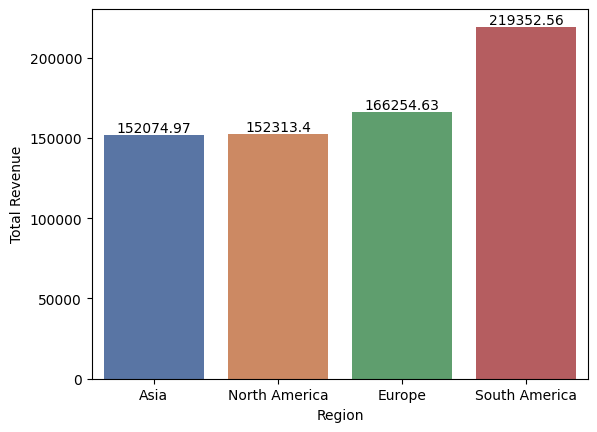

In [233]:
ax = sns.barplot(x = region_revenue.index, y = region_revenue.values,hue=region_revenue.index, palette="deep") 
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10)
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.show()

In [234]:
# REGION-CATEGORY
category_region_pivot_table = merged.pivot_table(values="TotalValue", index="Category", columns="Region", aggfunc='sum')
print(category_region_pivot_table)

Region           Asia    Europe  North America  South America
Category                                                     
Books        33119.03  47464.42       41811.99       69752.03
Clothing     49353.09  36335.59       38038.49       42443.49
Electronics  35658.15  41562.60       44716.43       58846.32
Home Decor   33944.70  40892.02       27746.49       48310.72


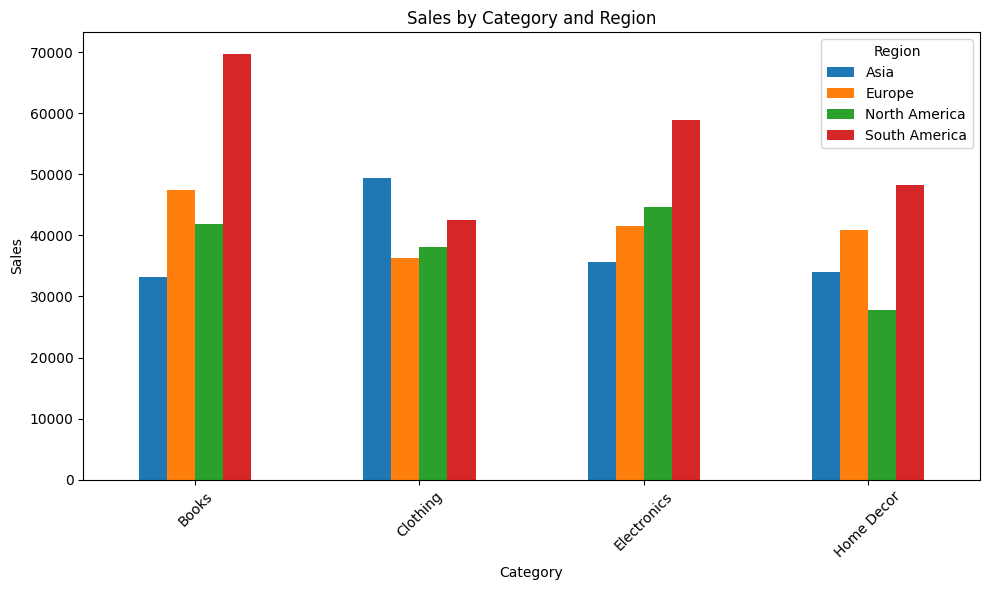

In [235]:
#Region_ Category Analysis
category_region_pivot_table.plot(kind='bar', figsize=(10, 6))
plt.title('Sales by Category and Region')
plt.ylabel('Sales')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

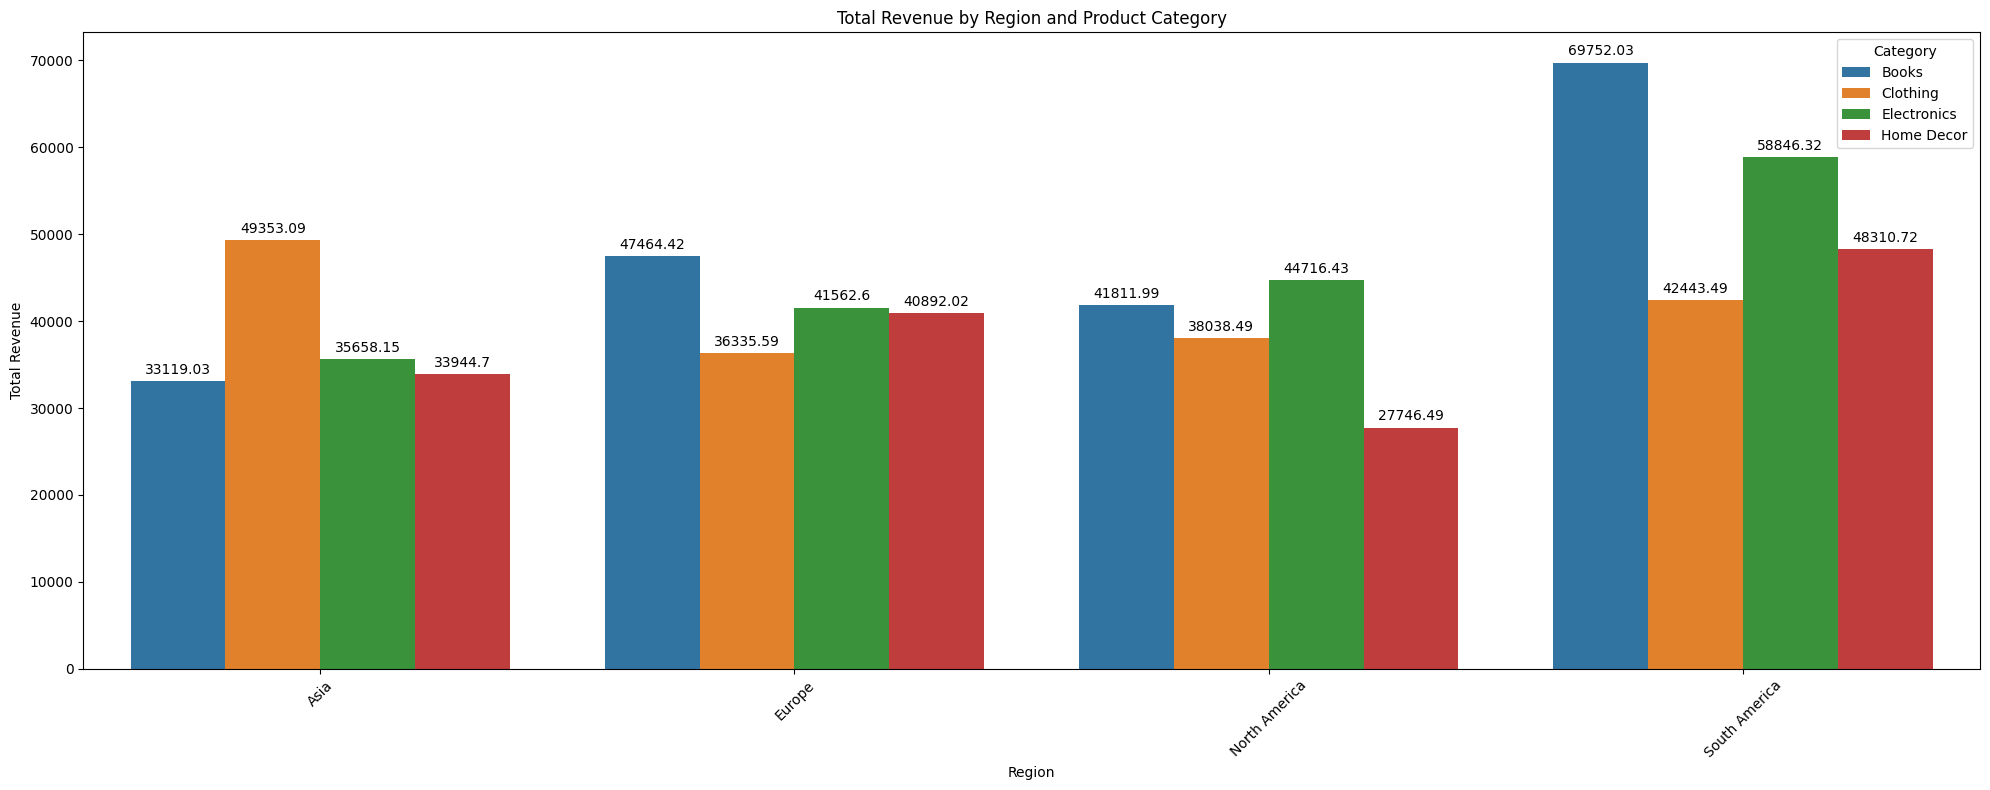

In [236]:
regional_category_revenue = merged.groupby(['Region', 'Category'])['TotalValue'].sum().reset_index()

# Plotting
plt.figure(figsize=(20, 8))
ax = sns.barplot(data=regional_category_revenue, x='Region', y='TotalValue', hue='Category')
plt.title('Total Revenue by Region and Product Category')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.legend(title='Category')

for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3, fontsize=10, labels=[round(v, 2) for v in container.datavalues])
    
plt.tight_layout()
plt.show()

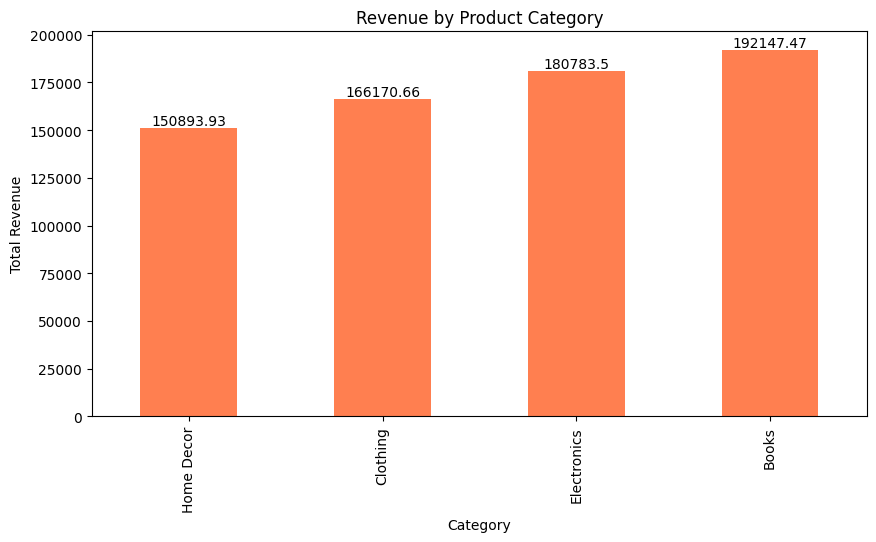

In [237]:
# Revenue by product category
category_revenue = merged.groupby('Category')['TotalValue'].sum().sort_values()

plt.figure(figsize=(10, 5))
ax = category_revenue.plot(kind='bar', title='Revenue by Product Category', color='coral')
plt.xlabel('Category')
plt.ylabel('Total Revenue')
for p in ax.patches:
    
    height = round(p.get_height(), 2)
    
    # Annotate the value on top of each bar
    ax.annotate(
        f'{height}',  
        (p.get_x() + p.get_width() / 2, p.get_height()),  
        ha='center',  
        va='bottom',  
        fontsize=10    
    )
plt.show()

In [238]:
print(category_revenue)

Category
Home Decor     150893.93
Clothing       166170.66
Electronics    180783.50
Books          192147.47
Name: TotalValue, dtype: float64


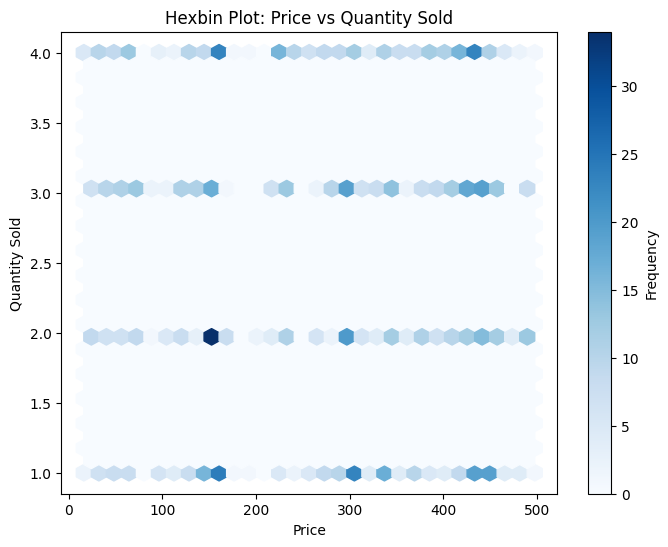

In [239]:
# Correlation between price and sales quantity
plt.figure(figsize=(8, 6))
plt.hexbin(merged['Price'], merged['Quantity'], gridsize=30, cmap='Blues')
plt.colorbar(label='Frequency')
plt.title('Hexbin Plot: Price vs Quantity Sold')
plt.xlabel('Price')
plt.ylabel('Quantity Sold')
plt.show()

In [240]:
# Seasonal Trends in Sales
monthly_sale = merged.groupby("Transaction_Month")["TotalValue"].sum().sort_index()
print(monthly_sale)

Transaction_Month
1     66376.39
2     51459.27
3     47828.73
4     57519.06
5     64527.74
6     48771.18
7     71366.39
8     63436.74
9     70603.75
10    47063.22
11    38224.37
12    62818.72
Name: TotalValue, dtype: float64


In [241]:
#monthly slaes
#monthly slaesx = list(monthly_sale.keys())  # Months
y = list(monthly_sale.values)  # Sales values

# Create a Plotly line graph
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=x,
    y=y,
    mode='lines+markers',  # Line with markers
    name='Monthly Sales',
    line=dict(color='blue', width=2),
    marker=dict(size=8)
))

# Add titles and labels
fig.update_layout(
    title="Monthly Sales Trend",
    xaxis_title="Transaction Month",
    yaxis_title="Total Sales Value",
    xaxis=dict(tickmode='linear', tick0=1, dtick=1),  
    template="plotly_white"  #
)


fig.show()

ValueError: 
    Invalid value of type 'builtins.int' received for the 'x' property of scatter
        Received value: 12

    The 'x' property is an array that may be specified as a tuple,
    list, numpy array, or pandas Series

In [ ]:
# top Performing Products:
top_products = merged.groupby("ProductID")["TotalValue"].sum().sort_values(ascending=False).head(10)
top_products

In [ ]:
plt.figure(figsize=(10, 6))
ax = top_products.plot(kind='bar', color='teal')
for p in ax.patches:
    ax.annotate(
        str(round(p.get_height(), 2)),  
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center',
        va='bottom',
        fontsize=10
    )
# Adding titles and labels
plt.title('Top 10 Products by Total Sales', fontsize=16)
plt.xlabel('ProductID', fontsize=12)
plt.ylabel('Total Sales Value', fontsize=12)

# Display the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
## Top customers
top_customers = merged.groupby("CustomerID")["TotalValue"].sum().sort_values(ascending=False).head(10)
top_customers

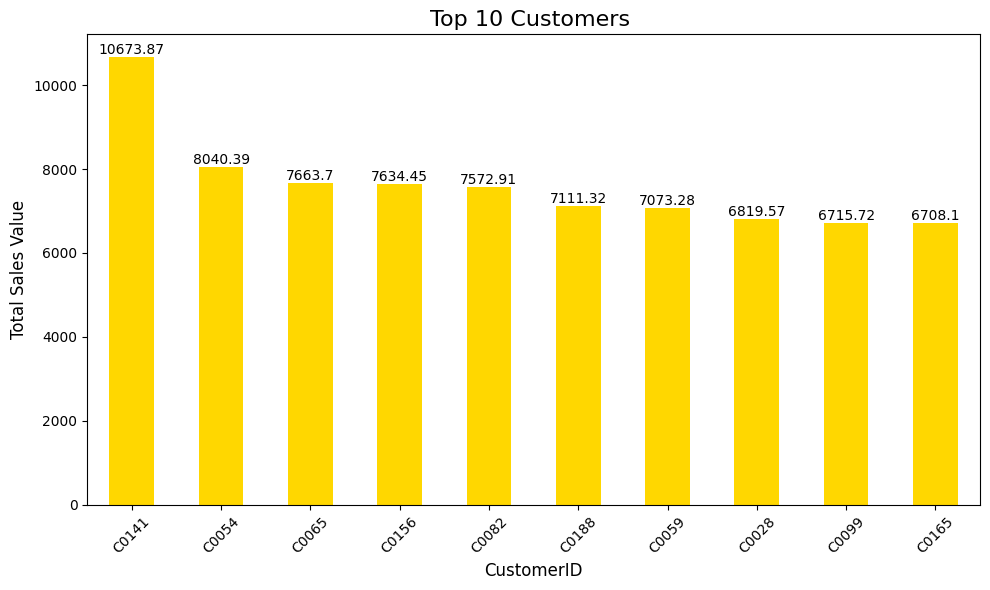

In [242]:
# Top Customers
plt.figure(figsize=(10, 6))
ax = top_customers.plot(kind='bar', color='gold')
for p in ax.patches:
    ax.annotate(
        str(round(p.get_height(), 2)),  # Round the height to 2 decimal places
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center',
        va='bottom',
        fontsize=10
    )
# Adding titles and labels
plt.title('Top 10 Customers ', fontsize=16)
plt.xlabel('CustomerID', fontsize=12)
plt.ylabel('Total Sales Value', fontsize=12)

# Display the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [243]:
# Signup_month _ transaction sales analysis
cohort_analysis = merged.groupby('Signup_Month')['TotalValue'].sum().reset_index()
print(cohort_analysis)

    Signup_Month  TotalValue
0              1    50971.95
1              2    70454.96
2              3    68098.04
3              4    84116.69
4              5    71323.34
5              6    43827.10
6              7    40860.92
7              8    32074.39
8              9    70042.44
9             10    52988.68
10            11    58397.37
11            12    46839.68


In [244]:
signups_per_month = Customers.groupby('Signup_Month')['CustomerID'].nunique().reset_index()
print(signups_per_month)

    Signup_Month  CustomerID
0              1          15
1              2          21
2              3          20
3              4          24
4              5          17
5              6          12
6              7          13
7              8          10
8              9          21
9             10          15
10            11          19
11            12          13


In [245]:
signups_per_month.columns = ['SignupMonth', 'Signups']
cohort_analysis.columns = ['SignupMonth', 'TotalRevenue']  # Rename for clarity

In [246]:
signup_analysis = pd.merge(signups_per_month, cohort_analysis, on='SignupMonth')
signup_analysis['AvgRevenuePerSignup'] = signup_analysis['TotalRevenue'] / signup_analysis['Signups']
print(signup_analysis)

    SignupMonth  Signups  TotalRevenue  AvgRevenuePerSignup
0             1       15      50971.95          3398.130000
1             2       21      70454.96          3354.998095
2             3       20      68098.04          3404.902000
3             4       24      84116.69          3504.862083
4             5       17      71323.34          4195.490588
5             6       12      43827.10          3652.258333
6             7       13      40860.92          3143.147692
7             8       10      32074.39          3207.439000
8             9       21      70042.44          3335.354286
9            10       15      52988.68          3532.578667
10           11       19      58397.37          3073.545789
11           12       13      46839.68          3603.052308


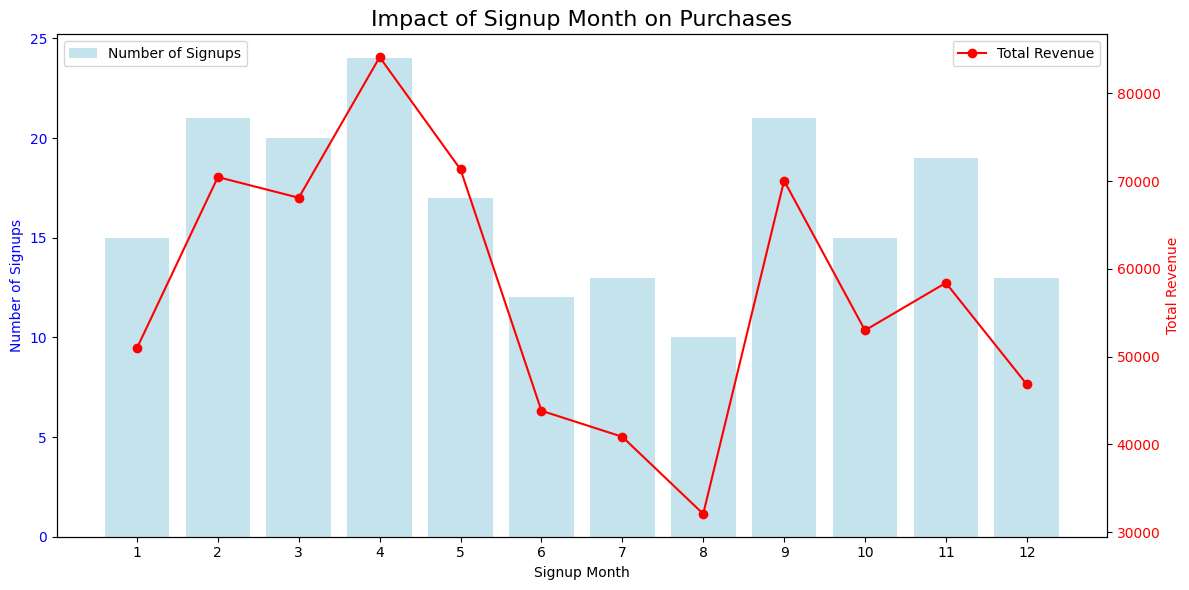

In [247]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for Signups
ax1.bar(signup_analysis['SignupMonth'].astype(str), 
        signup_analysis['Signups'], 
        color='lightblue', 
        alpha=0.7, 
        label='Number of Signups')
ax1.set_xlabel('Signup Month')
ax1.set_ylabel('Number of Signups', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Line plot for Total Revenue
ax2 = ax1.twinx()
ax2.plot(signup_analysis['SignupMonth'].astype(str), 
         signup_analysis['TotalRevenue'], 
         color='red', 
         marker='o', 
         label='Total Revenue')
ax2.set_ylabel('Total Revenue', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add Titles and Legends
plt.title('Impact of Signup Month on Purchases', fontsize=16)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()

# Show Plot
plt.show()


## END